In [19]:
import json
from __future__ import division

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option("display.max_columns", 200)

In [20]:
with open("cpuperformance.json") as f:
    data = json.load(f, encoding='UTF-8')
    rows = data['rows']
    data_t = list()
    for r in rows:
        data_r = {'id': r['id'], 'key': r['key']}
        data_r.update(r['value'])
        data_t.append(data_r)
    df = pd.DataFrame(data_t)

In [21]:
def convert(s, dtype):
    s = s.replace('None', np.nan)
    s = s.astype(dtype)
    return s

In [22]:
df['NUM_PROCESSORS'] = df['NUM_PROCESSORS'].astype(np.int32)
df['HEPSPEC'] = convert(df['HEPSPEC'], float)

In [23]:
df[:5]

,DIMM_TYPE,FREQUENCY_CPU0,FREQUENCY_CPU1,FREQUENCY_CPU10,FREQUENCY_CPU11,FREQUENCY_CPU12,FREQUENCY_CPU13,FREQUENCY_CPU14,FREQUENCY_CPU15,FREQUENCY_CPU16,FREQUENCY_CPU17,FREQUENCY_CPU18,FREQUENCY_CPU19,FREQUENCY_CPU2,FREQUENCY_CPU20,FREQUENCY_CPU21,FREQUENCY_CPU22,FREQUENCY_CPU23,FREQUENCY_CPU3,FREQUENCY_CPU4,FREQUENCY_CPU5,FREQUENCY_CPU6,FREQUENCY_CPU7,FREQUENCY_CPU8,FREQUENCY_CPU9,HEPSPEC,LOGICAL_CORES_CPU0,LOGICAL_CORES_CPU1,LOGICAL_CORES_CPU10,LOGICAL_CORES_CPU11,LOGICAL_CORES_CPU12,LOGICAL_CORES_CPU13,LOGICAL_CORES_CPU14,LOGICAL_CORES_CPU15,LOGICAL_CORES_CPU16,LOGICAL_CORES_CPU17,LOGICAL_CORES_CPU18,LOGICAL_CORES_CPU19,LOGICAL_CORES_CPU2,LOGICAL_CORES_CPU20,LOGICAL_CORES_CPU21,LOGICAL_CORES_CPU22,LOGICAL_CORES_CPU23,LOGICAL_CORES_CPU3,LOGICAL_CORES_CPU4,LOGICAL_CORES_CPU5,LOGICAL_CORES_CPU6,LOGICAL_CORES_CPU7,LOGICAL_CORES_CPU8,LOGICAL_CORES_CPU9,MODEL_CPU0,MODEL_CPU1,MODEL_CPU10,MODEL_CPU11,MODEL_CPU12,MODEL_CPU13,MODEL_CPU14,MODEL_CPU15,MODEL_CPU16,MODEL_CPU17,MODEL_CPU18,MODEL_CPU19,MODEL_CPU2,MODEL_CPU20,MODEL_CPU21,MODEL_CPU22,MODEL_CPU23,MODEL_CPU3,MODEL_CPU4,MODEL_CPU5,MODEL_CPU6,MODEL_CPU7,MODEL_CPU8,MODEL_CPU9,MOTHERBOARD_TYPE,NUM_DIMMS,NUM_PROCESSORS,PHYSICAL_CORES_CPU0,PHYSICAL_CORES_CPU1,PHYSICAL_CORES_CPU10,PHYSICAL_CORES_CPU11,PHYSICAL_CORES_CPU12,PHYSICAL_CORES_CPU13,PHYSICAL_CORES_CPU14,PHYSICAL_CORES_CPU15,PHYSICAL_CORES_CPU16,PHYSICAL_CORES_CPU17,PHYSICAL_CORES_CPU18,PHYSICAL_CORES_CPU19,PHYSICAL_CORES_CPU2,PHYSICAL_CORES_CPU20,PHYSICAL_CORES_CPU21,PHYSICAL_CORES_CPU22,PHYSICAL_CORES_CPU23,PHYSICAL_CORES_CPU3,PHYSICAL_CORES_CPU4,PHYSICAL_CORES_CPU5,PHYSICAL_CORES_CPU6,PHYSICAL_CORES_CPU7,PHYSICAL_CORES_CPU8,PHYSICAL_CORES_CPU9,SMT_CPU0,SMT_CPU1,SMT_CPU10,SMT_CPU11,SMT_CPU12,SMT_CPU13,SMT_CPU14,SMT_CPU15,SMT_CPU16,SMT_CPU17,SMT_CPU18,SMT_CPU19,SMT_CPU2,SMT_CPU20,SMT_CPU21,SMT_CPU22,SMT_CPU23,SMT_CPU3,SMT_CPU4,SMT_CPU5,SMT_CPU6,SMT_CPU7,SMT_CPU8,SMT_CPU9,TOTAL_MEMORY,id,key
0,DDR3,2270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel(R) Xeon(R) CPU L5520 @ 2.27GHz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PowerEdgeM610,3,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12288,CA1505034 1176M4J,CA1505034
1,DDR3,2270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel(R) Xeon(R) CPU L5520 @ 2.27GHz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PowerEdgeM610,3,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12288,CA1505034 1G48M4J,CA1505034
2,DDR3,2270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel(R) Xeon(R) CPU L5520 @ 2.27GHz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PowerEdgeM610,3,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12288,CA1505034 1NF7M4J,CA1505034
3,DDR3,2270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel(R) Xeon(R) CPU L5520 @ 2.27GHz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PowerEdge

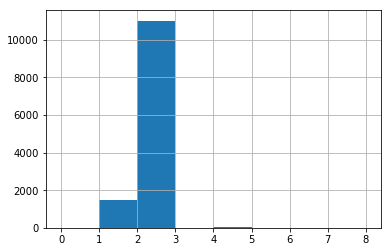

In [24]:
df['NUM_PROCESSORS'].hist(bins=8, range=[0, 8])

In [25]:
cpus = df['MODEL_CPU1'].unique()

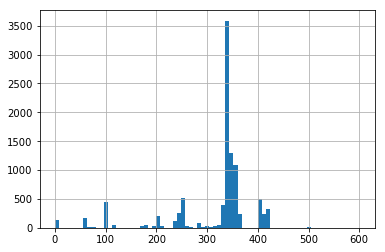

In [26]:
df['HEPSPEC'].hist(bins=75, range=[0, 600])

In [27]:
grouped = df.groupby(['NUM_PROCESSORS', 'MODEL_CPU0', 'SMT_CPU0'], as_index=False)
agg = grouped.agg({'HEPSPEC': [np.mean, np.std], 'LOGICAL_CORES_CPU0': np.mean, 'PHYSICAL_CORES_CPU0': np.mean})
agg['HS06_core'] = agg['HEPSPEC']['mean'] / agg['NUM_PROCESSORS'] / agg['LOGICAL_CORES_CPU0']['mean']
agg['HS06_core_err'] = agg['HEPSPEC']['std'] / agg['NUM_PROCESSORS'] / agg['LOGICAL_CORES_CPU0']['mean']
agg.to_csv('proc_data.csv', header=True)
print agg

   NUM_PROCESSORS                                  MODEL_CPU0 SMT_CPU0  \
                                                                         
0               1  Intel(R) Xeon(R) CPU E3-1265L V2 @ 2.50GHz    False   
1               1      Intel(R) Xeon(R) CPU E31260L @ 2.40GHz    False   
2               1      Intel(R) Xeon(R) CPU E31260L @ 2.40GHz     True   
3               1   Intel(R) Xeon(R) CPU E5-2620 v2 @ 2.10GHz     True   
4               1    Intel(R) Xeon(R) CPU E5-2650 0 @ 2.00GHz    False   
5               1    Intel(R) Xeon(R) CPU E5-2650 0 @ 2.00GHz     True   
6               1        Intel(R) Xeon(R) CPU L5520 @ 2.27GHz    False   
7               1        Intel(R) Xeon(R) CPU L5520 @ 2.27GHz     True   
8               1        Intel(R) Xeon(R) CPU L5640 @ 2.27GHz    False   
9               2              AMD Opteron(TM) Processor 6276     True   
10              2              AMD Opteron(TM) Processoz 6276     True   
11              2              AMD Opt

In [28]:
atlas_cpus_smt_on = {
    'AMD Opteron(TM) Processor 6276': 0.644929082125,
    'Intel(R) Xeon(R) CPU E5-2650 0 @ 2.00GHz': 0.745179127539,
    'Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz': 1.17413237659,
    'Intel(R) Xeon(R) CPU E5-2630L 0 @ 2.00GHz': 0.943242069361,
    'Intel(R) Xeon(R) CPU E5-2630 v3 @ 2.40GHz': 1.2362629625,
    'Intel(R) Xeon(R) CPU L5520 @ 2.27GHz': 0.767225437081
}

In [29]:
atlas_cpus_smt_off = {
    'Intel(R) Xeon(R) CPU E5-2630L 0 @ 2.00GHz': 0.848766537562,
    'Intel(R) Xeon(R) CPU E5-2630 v3 @ 2.40GHz': 1.18572059213
}

Intel(R) Xeon(R) CPU E5-2630L 0 @ 2.00GHz: 6 hw threads, 6 cores, HS06: 204.000 +- 0.000, HS06/hw thread: 17.000 +- 0.000
Intel(R) Xeon(R) CPU E5-2630 v3 @ 2.40GHz: 8 hw threads, 8 cores, HS06: 342.643 +- 0.930, HS06/hw thread: 21.415 +- 0.058


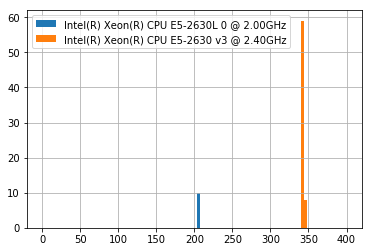

In [33]:
leg = list()
for c, k in atlas_cpus_smt_off.items():
    hs06 = df[(df['MODEL_CPU0'] == c) & (df['NUM_PROCESSORS'] == 2) & (df['SMT_CPU0'] == False)]['HEPSPEC']
    cores = df[(df['MODEL_CPU0'] == c) & (df['NUM_PROCESSORS'] == 2) & (df['SMT_CPU0'] == False)]['LOGICAL_CORES_CPU0']
    pcores = df[(df['MODEL_CPU0'] == c) & (df['NUM_PROCESSORS'] == 2) & (df['SMT_CPU0'] == False)]['PHYSICAL_CORES_CPU0']
    hs06.hist(bins=100, range=[0,400])
    leg.append(c)
    print '%s: %d hw threads, %d cores, HS06: %.3f +- %.3f, HS06/hw thread: %.3f +- %.3f' % \
    (c, cores.mean(), pcores.mean(), hs06.mean(), hs06.std(), hs06.mean() / cores.mean() / 2., hs06.std() / cores.mean() / 2.)
plt.legend(leg)

AMD Opteron(TM) Processor 6276: 16 hw threads, 8 cores, HS06: 250.214 +- 4.115, HS06/hw thread: 7.819 +- 0.129
Intel(R) Xeon(R) CPU E5-2630 v3 @ 2.40GHz: 16 hw threads, 8 cores, HS06: 342.955 +- 2.801, HS06/hw thread: 10.717 +- 0.088
Intel(R) Xeon(R) CPU L5520 @ 2.27GHz: 8 hw threads, 4 cores, HS06: 97.035 +- 0.072, HS06/hw thread: 6.065 +- 0.004
Intel(R) Xeon(R) CPU E5-2650 0 @ 2.00GHz: 16 hw threads, 8 cores, HS06: 256.073 +- 23.763, HS06/hw thread: 8.002 +- 0.743
Intel(R) Xeon(R) CPU E5-2630L 0 @ 2.00GHz: 12 hw threads, 6 cores, HS06: 203.804 +- 1.898, HS06/hw thread: 8.492 +- 0.079
Intel(R) Xeon(R) CPU E5-2650 v2 @ 2.60GHz: 16 hw threads, 8 cores, HS06: 347.300 +- 11.565, HS06/hw thread: 10.853 +- 0.361


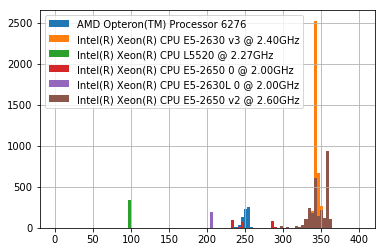

In [34]:
leg = list()
for c, k in atlas_cpus_smt_on.items():
    hs06 = df[(df['MODEL_CPU0'] == c) & (df['NUM_PROCESSORS'] == 2) & (df['SMT_CPU0'] == True)]['HEPSPEC']
    cores = df[(df['MODEL_CPU0'] == c) & (df['NUM_PROCESSORS'] == 2) & (df['SMT_CPU0'] == True)]['LOGICAL_CORES_CPU0']
    pcores = df[(df['MODEL_CPU0'] == c) & (df['NUM_PROCESSORS'] == 2) & (df['SMT_CPU0'] == True)]['PHYSICAL_CORES_CPU0']
    hs06.hist(bins=100, range=[0,400])
    leg.append(c)
    print '%s: %d hw threads, %d cores, HS06: %.3f +- %.3f, HS06/hw thread: %.3f +- %.3f' % \
    (c, cores.mean(), pcores.mean(), hs06.mean(), hs06.std(), hs06.mean() / cores.mean() / 2., hs06.std() / cores.mean() / 2.)
plt.legend(leg)